# Common import and setup


In [1]:
import os, sys, time, pytest

import matplotlib.pyplot as plt
from matplotlib import patches, lines
import numpy as np
import pandas as pd
from pandas.testing import assert_frame_equal

import pdfminer

from IPython.display import display

# Make sure we use the local version of camelot if it is here
sys.path.insert(0, os.path.abspath(''))

import camelot
from camelot.core import Table, TableList, TextEdges
from camelot.__version__ import generate_version
from camelot.utils import get_text_objects, text_in_bbox
from camelot.parsers.stream import Stream
from camelot.parsers.lattice import Lattice
from camelot.parsers.network import Network
from camelot.parsers.hybrid import Hybrid
from camelot.handlers import PDFHandler
from camelot.plotting import draw_pdf
from tests.data import *

testdir = os.path.dirname(os.path.abspath('.'))
testdir = os.path.join(testdir, "camelot/tests/files")

# To check which library we're using
camelot.__file__


'/Users/francoishuet/Code/camelot/camelot/__init__.py'

## Selection of file to review

This is seeded with the unit test files for convenience.

In [6]:
kwargs = {}
data = None
# pdf_file, kwargs, data = "superscript.pdf", {"flag_size": True}, data_stream_flag_size # test_hybrid_flag_size
# pdf_file = "health.pdf"  # test_hybrid
# pdf_file = "clockwise_table_2.pdf"
pdf_file = "tabula/12s0324.pdf" # interesting because contains two separate tables
# pdf_file = "clockwise_table_2.pdf"  # test_hybrid_table_rotated / test_stream_table_rotated
# pdf_file, kwargs = "tabula/us-007.pdf", {"table_regions": ["320,335,573,505"]} # test_hybrid_table_regions
# pdf_file, kwargs = "detect_vertical_false.pdf", {"strip_text": " ,\n"}  # data_stream_strip_text
# pdf_file, kwargs, data = "tabula/m27.pdf", {"columns": ["72,95,209,327,442,529,566,606,683"], "split_text": True, }, data_stream_split_text  # data_stream_split_text
# pdf_file = "vertical_header.pdf"
# pdf_file, kwargs = "vertical_header.pdf", {"pages": "2"}
# pdf_file, kwargs = "PIR_Prospetto.dOfferta.pdf", {"pages": "6"}
# pdf_file = "twotables_2.pdf"
# pdf_file = "camelot-issue-132-multiple-tables.pdf"
# pdf_file, kwargs, data = "edge_tol.pdf", {"edge_tol": 500}, data_stream_edge_tol
# pdf_file, kwargs, data = "edge_tol.pdf", {}, data_stream_edge_tol
# pdf_file, kwargs = "tabula/icdar2013-dataset/competition-dataset-us/us-030.pdf", {"pages": "2"}  # test_lattice
# pdf_file, kwargs = "background_lines_1.pdf", {} # {"process_background": True}  # test_lattice_process_background

filename = os.path.join(testdir, pdf_file)

Found 2 table(s) via algo stream:
Flavor stream table 0:


0  \
0   Program. Represents arrests reported (not char...   
1   by the FBI. Some persons may be arrested more ...   
2   could represent multiple arrests of the same p...   
3                                                       
4                                     Offense charged   
5                                                       
6   Total   .\n .\n .  .  .  .  .  .\n .  .\n .  ....   
7   Violent crime   .  .  .  .  .  .  .  .\n .  .\...   
8                             Murder and nonnegligent   
9   manslaughter . . . . . . . .\n. .\n. .\n. .\n....   
10  Forcible rape . . . . . . . .\n. .\n. .\n. .\n...   
11  Robbery . . . .\n. .\n. . .\n. . .\n.\n. . .\n...   
12   Aggravated assault  . . . . . . . .\n. .\n. .\n.   
13  Property crime  .  .  .  .\n .  .\n .  .  .\n ...   
14  Burglary . .\n. . . . . .\n. .\n.\n. .\n.\n.\n...   
15  Larceny-theft . . . . . . . .\n. .\n. .\n. .\n...   
16  Motor vehicle theft . . . . .\n. .\n. . .\n.\n...   
17  Arson .\n. . . . .\n. . .\n.\n. .\n.\n.\n. .\n...   
18  Other assaults .\n. . . . . .\n. . .\n.\n. . ....   
19     Forgery and counterfeiting .\n. . . . . . .\n.   
20  Fraud .\n.\n.\n. .\n. . . .\n. .\n.\n. .\n.\n....   
21  Embezzlement . . .\n. . . . .\n. . .\n.\n. . ....   
22  Stolen property 1  . . . . . . .\n. . .\n. .\n...   
23  Vandalism  . . . . . . . .\n. .\n. .\n. .\n. ....   
24              Weapons; carrying, possessing, etc. .   
25               Prostitution and commercialized vice   
26  Sex offenses 2  . . . . .\n. . . . .\n. .\n. ....   
27  Drug abuse violations  . . . . . . . .\n. .\n.\n.   
28  Gambling .\n. . . . . .\n. .\n.\n. . .\n.\n. ....   
29                    Offenses against the family and   
30  children . . . .\n. . . .\n. .\n. .\n. .\n. .\...   
31       Driving under the influence . . . . . .\n. .   
32  Liquor laws  . . . . . . . .\n. .\n. .\n. .\n....   
33  Drunkenness . . .\n. . . . .\n. . .\n.\n. . .\...   
34  Disorderly conduct . .\n. . . . . . .\n. .\n. ...   
35  Vagrancy . . . .\n. . . . .\n.\n. .\n.\n.\n. ....   
36       All other offenses (except traffic) . . .\n.   
37  Suspicion . . . .\n. . . .\n. .\n. .\n. .\n. ....   
38          Curfew and loitering law violations  .\n.   
39  Runaways  . . . . . . . .\n. .\n. .\n. .\n. .\...   
40                                                      

                                                    1         2         3  \
0                                                                           
1                                                                           
2                                                                           
3                                                         Total             
4                                                      Under 18  18 years   
5                                               Total     years  and over   
6                                           11,062 .6  1,540 .0  9,522 .6   
7                                              467 .9     69 .1    398 .8   
8                                                                           
9                                                10.0       0.9       9.1   
10                                               17.5       2.6      14.9   
11                                              102.1      25.5      76.6   
12                                              338.4      40.1     298.3   
13                                           1,396 .4    338 .7  1,057 .7   
14                                              240.9      60.3     180.6   
15                                            1,080.1     258.1     822.0   
16                                               65.6      16.0      49.6   
17                                                9.8       4.3       5.5   
18                                            1,061.3     175.3     886.1   
19                                               68.9       1.7      67.2   
20                                      

After Flavor stream table 0:
Flavor stream table 1:


0           1          2  \
0                    Table 325. Arrests by Race: 2009                          
1   [Based on Uniform Crime Reporting (UCR) Progra...                          
2   with a total population of 239,839,971 as esti...                          
3                                                                              
4                                     Offense charged                          
5                                                           Total      White   
6   Total  .\n .\n .\n .\n .  .\n .  .  .\n .  .  ...  10,690,561  7,389,208   
7   Violent crime   .  .  .  .  .  .  .  .\n .  .\...     456,965    268,346   
8   Murder and nonnegligent manslaughter . .\n. .\...       9,739      4,741   
9   Forcible rape . . . . . . . .\n. .\n. .\n. .\n...      16,362     10,644   
10  Robbery . . . . .\n. . . . .\n.\n. . .\n.\n. ....     100,496     43,039   
11  Aggravated assault  . . . . . . . .\n. .\n. .\...     330,368    209,922   
12  Property crime  .  .  .  .  .\n .  .  .  .  .\...   1,364,409    922,139   
13  Burglary . . .\n. . . . .\n. . .\n.\n.\n. .\n....     234,551    155,994   
14  Larceny-theft . . . . . . . .\n. .\n. .\n. .\n...   1,056,473    719,983   
15  Motor vehicle theft . . . . . .\n. .\n.\n. . ....      63,919     39,077   
16  Arson .\n. . . .\n. .\n. .\n. .\n.\n. .\n.\n.\...       9,466      7,085   
17  Other assaults .\n. . . . . . .\n.\n. . .\n.\n...   1,032,502    672,865   
18  Forgery and counterfeiting .\n. . . . . . .\n....      67,054     44,730   
19  Fraud .\n.\n. . . . . .\n. .\n. .\n. .\n. .\n....     161,233    108,032   
20  Embezzlement . . . .\n. . . . .\n.\n. . .\n.\n...      13,960      9,208   
21  Stolen property; buying, receiving, possessing...      82,714     51,953   
22  Vandalism  . . . . . . . .\n. .\n. .\n. .\n. ....     212,173    157,723   
23  Weapons—carrying, possessing, etc. .\n. .\n. ....     130,503     74,942   
24  Prostitution and commercialized vice  . .\n.\n...      56,560     31,699   
25  Sex offenses 1 . . . . . . . .\n. .\n. .\n. .\...      60,175     44,240   
26  Drug abuse violations  . . . . . . . .\n. . .\...   1,301,629    845,974   
27  Gambling . . . . .\n. . . . .\n.\n. . .\n.\n. ...       8,046      2,290   
28  Offenses against the family and children .\n.\...      87,232     58,068   
29  Driving under the influence . . . . . . .\n. ....   1,105,401    954,444   
30  Liquor laws  . . . . . . . .\n. .\n. .\n. .\n....     444,087    373,189   
31  Drunkenness . .\n. . . . . . .\n.\n. . .\n.\n....     469,958    387,542   
32  Disorderly conduct . . .\n. . . . . .\n. .\n. ...     515,689    326,563   
33  Vagrancy . . .\n. .\n. . . .\n. .\n.\n. .\n.\n...      26,347     14,581   
34  All other offenses (except traffic) . .\n. .\n...   2,929,217  1,937,221   
35  Suspicion . . .\n. . . . .\n. .\n. .\n. .\n. ....       1,513        677   
36  Curfew and loitering law violations  . .\n. .\...      89,578     54,439   
37  Runaways  . . . . . . . .\n. .\n. .\n. .\n. .\...      73,616     48,343   
38           1 Except forcible rape and prostitution.                          

            3               4              5  
0                                             
1                                             
2                                             
3                    American                 
4              Indian/Alaskan  Asian Pacific  
5       Black          Native       Islander  
6   3,027,153         150,544        123,656  
7     177,766           5,608          5,245  
8       4,801             100             97  
9       5,319             169            230  
10     55,742             726            989  
11    111,904           4,613          3,929  
12    406,382          17,599         18,289  
13     74,419           2,021          2,117  
14    306,625          14,646         15,219  
15     23,184             817            841  
16      2,154             115            112  
17   

After Flavor stream table 1:
Found 2 table(s) via algo lattice:
Flavor lattice table 0:


0  \
0                                    Offense charged   
1                                                      
2  Total   .\n .\n .  .  .  .  .  .\n .  .\n .  ....   

                                                   1  \
0                                              Total   
1       Under 18 \n18 years \nTotal\nyears\nand over   
2  11,062 .6\n1,540 .0\n9,522 .6\n467 .9\n69 .1\n...   

                                                   2  \
0                                               Male   
1       Under 18 \n18 years \nTotal\nyears\nand over   
2  8,263 .3\n1,071 .6\n7,191 .7\n380 .2\n56 .5\n3...   

                                                   3  
0                                             Female  
1       Under 18 \n18 years \nTotal\nyears\nand over  
2  2,799 .2\n468 .3\n2,330 .9\n87 .7\n12 .6\n75 ....

After Flavor lattice table 0:
Flavor lattice table 1:


0  \
0                                    Offense charged   
1  Total  .\n .\n .\n .\n .  .\n .  .  .\n .  .  ...   

                                                   1  \
0                                              Total   
1  10,690,561 \n 456,965 \n 9,739 \n 16,362 \n 10...   

                                                   2  
0  American \nIndian/Alaskan \nAsian Pacific \nWh...  
1  7,389,208 \n 3,027,153 \n 150,544 \n 123,656 \...

After Flavor lattice table 1:
Found 2 table(s) via algo network:
Flavor network table 0:


0          1         2  \
0                                                                    Total   
1                                     Offense charged             Under 18   
2                                                          Total     years   
3   Total   .\n .\n .  .  .  .  .  .\n .  .\n .  ....  11,062 .6  1,540 .0   
4   Violent crime   .  .  .  .  .  .  .  .\n .  .\...     467 .9     69 .1   
5                             Murder and nonnegligent                        
6   manslaughter . . . . . . . .\n. .\n. .\n. .\n....       10.0       0.9   
7   Forcible rape . . . . . . . .\n. .\n. .\n. .\n...       17.5       2.6   
8   Robbery . . . .\n. .\n. . .\n. . .\n.\n. . .\n...      102.1      25.5   
9    Aggravated assault  . . . . . . . .\n. .\n. .\n.      338.4      40.1   
10  Property crime  .  .  .  .\n .  .\n .  .  .\n ...   1,396 .4    338 .7   
11  Burglary . .\n. . . . . .\n. .\n.\n. .\n.\n.\n...      240.9      60.3   
12  Larceny-theft . . . . . . . .\n. .\n. .\n. .\n...    1,080.1     258.1   
13  Motor vehicle theft . . . . .\n. .\n. . .\n.\n...       65.6      16.0   
14  Arson .\n. . . . .\n. . .\n.\n. .\n.\n.\n. .\n...        9.8       4.3   
15  Other assaults .\n. . . . . .\n. . .\n.\n. . ....    1,061.3     175.3   
16     Forgery and counterfeiting .\n. . . . . . .\n.       68.9       1.7   
17  Fraud .\n.\n.\n. .\n. . . .\n. .\n.\n. .\n.\n....      173.7       5.1   
18  Embezzlement . . .\n. . . . .\n. . .\n.\n. . ....       14.6         –   
19  Stolen property 1  . . . . . . .\n. . .\n. .\n...       84.3      15.1   
20  Vandalism  . . . . . . . .\n. .\n. .\n. .\n. ....      217.4      72.7   
21              Weapons; carrying, possessing, etc. .      132.9      27.1   
22               Prostitution and commercialized vice       56.9       1.1   
23  Sex offenses 2  . . . . .\n. . . . .\n. .\n. ....       61.5      10.7   
24  Drug abuse violations  . . . . . . . .\n. .\n.\n.    1,333.0     136.6   
25  Gambling .\n. . . . . .\n. .\n.\n. . .\n.\n. ....        8.2       1.4   
26                    Offenses against the family and                        
27  children . . . .\n. . . .\n. .\n. .\n. .\n. .\...       92.4       3.7   
28       Driving under the influence . . . . . .\n. .    1,158.5     109.2   
29  Liquor laws  . . . . . . . .\n. .\n. .\n. .\n....       48.2      90.2   
30  Drunkenness . . .\n. . . . .\n. . .\n.\n. . .\...      488.1      11.4   
31  Disorderly conduct . .\n. . . . . . .\n. .\n. ...      529.5     136.1   
32  Vagrancy . . . .\n. . . . .\n.\n. .\n.\n.\n. ....       26.6       2.2   
33       All other offenses (except traffic) . . .\n.      306.1     263.4   
34  Suspicion . . . .\n. . . .\n. .\n. .\n. .\n. ....        1.6         –   
35          Curfew and loitering law violations  .\n.       91.0      91.0   
36  Runaways  . . . . . . . .\n. .\n. .\n. .\n. .\...       75.8      75.8   

           3         4         5         6         7         8         9  
0                           Male                        Female            
1   18 years            Under 18  18 years            Under 18  18 years  
2   and over     Total     years  and over     Total     years  and over  
3   9,522 .6  8,263 .3  1,071 .6  7,191 .7  2,799 .2    468 .3  2,330 .9  
4     398 .8    380 .2     56 .5    323 .7     87 .7     12 .6     75 .2  
5                                                                         
6        9.1       9.0       0.9       8.1       1.1         –       1.0  
7       14.9      17.2       2.5      14.7         –         –         –  
8       76.6      90.0      22.9      67.1      12.1       2.5       9.5  
9      298.3     264.0      30.2     233.8      74.4       9.9      64.5  
10  1,057 .7    875 .9    210 .8    665 .1    608 .2    127 .9    392 .6  
11     180.6     205.0      53.4     151.7      35.9       6.9      29.0  
12     822.0     608.8     140.5     468.3     471.3     117.6     353.6  
13      49.6      53.9      13.3     

After Flavor network table 0:
Flavor network table 1:


0           1          2  \
0                                                                              
1                                     Offense charged                          
2                                                           Total      White   
3   Total  .\n .\n .\n .\n .  .\n .  .  .\n .  .  ...  10,690,561  7,389,208   
4   Violent crime   .  .  .  .  .  .  .  .\n .  .\...     456,965    268,346   
5   Murder and nonnegligent manslaughter . .\n. .\...       9,739      4,741   
6   Forcible rape . . . . . . . .\n. .\n. .\n. .\n...      16,362     10,644   
7   Robbery . . . . .\n. . . . .\n.\n. . .\n.\n. ....     100,496     43,039   
8   Aggravated assault  . . . . . . . .\n. .\n. .\...     330,368    209,922   
9   Property crime  .  .  .  .  .\n .  .  .  .  .\...   1,364,409    922,139   
10  Burglary . . .\n. . . . .\n. . .\n.\n.\n. .\n....     234,551    155,994   
11  Larceny-theft . . . . . . . .\n. .\n. .\n. .\n...   1,056,473    719,983   
12  Motor vehicle theft . . . . . .\n. .\n.\n. . ....      63,919     39,077   
13  Arson .\n. . . .\n. .\n. .\n. .\n.\n. .\n.\n.\...       9,466      7,085   
14  Other assaults .\n. . . . . . .\n.\n. . .\n.\n...   1,032,502    672,865   
15  Forgery and counterfeiting .\n. . . . . . .\n....      67,054     44,730   
16  Fraud .\n.\n. . . . . .\n. .\n. .\n. .\n. .\n....     161,233    108,032   
17  Embezzlement . . . .\n. . . . .\n.\n. . .\n.\n...      13,960      9,208   
18  Stolen property; buying, receiving, possessing...      82,714     51,953   
19  Vandalism  . . . . . . . .\n. .\n. .\n. .\n. ....     212,173    157,723   
20  Weapons—carrying, possessing, etc. .\n. .\n. ....     130,503     74,942   
21  Prostitution and commercialized vice  . .\n.\n...      56,560     31,699   
22  Sex offenses 1 . . . . . . . .\n. .\n. .\n. .\...      60,175     44,240   
23  Drug abuse violations  . . . . . . . .\n. . .\...   1,301,629    845,974   
24  Gambling . . . . .\n. . . . .\n.\n. . .\n.\n. ...       8,046      2,290   
25  Offenses against the family and children .\n.\...      87,232     58,068   
26  Driving under the influence . . . . . . .\n. ....   1,105,401    954,444   
27  Liquor laws  . . . . . . . .\n. .\n. .\n. .\n....     444,087    373,189   
28  Drunkenness . .\n. . . . . . .\n.\n. . .\n.\n....     469,958    387,542   
29  Disorderly conduct . . .\n. . . . . .\n. .\n. ...     515,689    326,563   
30  Vagrancy . . .\n. .\n. . . .\n. .\n.\n. .\n.\n...      26,347     14,581   
31  All other offenses (except traffic) . .\n. .\n...   2,929,217  1,937,221   
32  Suspicion . . .\n. . . . .\n. .\n. .\n. .\n. ....       1,513        677   
33  Curfew and loitering law violations  . .\n. .\...      89,578     54,439   
34  Runaways  . . . . . . . .\n. .\n. .\n. .\n. .\...      73,616     48,343   

            3               4              5  
0                    American                 
1              Indian/Alaskan  Asian Pacific  
2       Black          Native       Islander  
3   3,027,153         150,544        123,656  
4     177,766           5,608          5,245  
5       4,801             100             97  
6       5,319             169            230  
7      55,742             726            989  
8     111,904           4,613          3,929  
9     406,382          17,599         18,289  
10     74,419           2,021          2,117  
11    306,625          14,646         15,219  
12     23,184             817            841  
13      2,154             115            112  
14    332,435          15,127         12,075  
15     21,251             345            728  
16     50,367           1,315          1,519  
17      4,429              75            248  
18     29,357             662            742  
19     48,746           3,352          2,352  
20     53,441             951          1,169  
21     23,021             427          1,413  
22     14,347             715            873  
23    437,623           8,588          9,44

After Flavor network table 1:
Found 2 table(s) via algo hybrid:
Flavor hybrid table 0:


0  \
0                                               
1                                               
2                                               
3                                   Total   .   
4      Violent crime   .  .  .  .  .  .  .  .   
5                     Murder and nonnegligent   
6                manslaughter . . . . . . . .   
7               Forcible rape . . . . . . . .   
8                             Robbery . . . .   
9         Aggravated assault  . . . . . . . .   
10                 Property crime  .  .  .  .   
11                               Burglary . .   
12              Larceny-theft . . . . . . . .   
13              Motor vehicle theft . . . . .   
14                                    Arson .   
15                           Other assaults .   
16               Forgery and counterfeiting .   
17                                    Fraud .   
18                         Embezzlement . . .   
19           Stolen property 1  . . . . . . .   
20                 Vandalism  . . . . . . . .   
21      Weapons; carrying, possessing, etc. .   
22       Prostitution and commercialized vice   
23                  Sex offenses 2  . . . . .   
24     Drug abuse violations  . . . . . . . .   
25                                 Gambling .   
26            Offenses against the family and   
27                           children . . . .   
28    Driving under the influence . . . . . .   
29               Liquor laws  . . . . . . . .   
30                          Drunkenness . . .   
31                     Disorderly conduct . .   
32                           Vagrancy . . . .   
33  All other offenses (except traffic) . . .   
34                          Suspicion . . . .   
35     Curfew and loitering law violations  .   
36                  Runaways  . . . . . . . .   

                                                    1          2         3  \
0                                                                    Total   
1                                     Offense charged             Under 18   
2                                                          Total     years   
3   .\n .  .  .  .  .  .\n .  .\n .  .\n .  .\n . ...  11,062 .6  1,540 .0   
4                    .  .\n .  .\n .  .\n .  .\n .  .     467 .9     69 .1   
5                                                                            
6                               . .\n. .\n. .\n. .\n.       10.0       0.9   
7                             . .\n. .\n. .\n. .\n. .       17.5       2.6   
8         . .\n. . .\n. . .\n.\n. . .\n.\n. . .\n.\n.      102.1      25.5   
9                                         . .\n. .\n.      338.4      40.1   
10          .  .\n .  .  .\n .  .  .\n .\n .  .  .  .   1,396 .4    338 .7   
11  . . . . . .\n. .\n.\n. .\n.\n.\n. .\n.\n.\n. .\n.      240.9      60.3   
12                            . .\n. .\n. .\n. .\n. .    1,080.1     258.1   
13                              . .\n. . .\n.\n.\n. .       65.6      16.0   
14  . . . . .\n. . .\n.\n. .\n.\n.\n. .\n.\n.\n. ....        9.8       4.3   
15            . . . . . .\n. . .\n.\n. . .\n.\n. .\n.    1,061.3     175.3   
16                                   . . . . . . .\n.       68.9       1.7   
17  .\n.\n. .\n. . . .\n. .\n.\n. .\n.\n.\n. .\n.\...      173.7       5.1   
18                . . . . .\n. . .\n.\n. . .\n.\n.\n.       14.6         –   
19                              . . .\n. .\n. .\n.\n.       84.3      15.1   
20                   . .\n. .\n. .\n. .\n. .\n.\n.\n.      217.4      72.7   
21                                                         132.9      27.1   
22                                                          56.9       1.1   
23                      . . . . .\n. .\n. .\n. . .\n.       61.5      10.7   
24                                          . .\n.\n.    1,333.0     136.6   
25  . . . . . .\n. .\n.\n. . .\n.\n. . .\n.\n. .\n...        8.2       1.4   
26                                                                         

After Flavor hybrid table 0:
Flavor hybrid table 1:


0  \
0                                                      
1                                                      
2                                                      
3                                           Total  .   
4             Violent crime   .  .  .  .  .  .  .  .   
5           Murder and nonnegligent manslaughter . .   
6                      Forcible rape . . . . . . . .   
7                                  Robbery . . . . .   
8                Aggravated assault  . . . . . . . .   
9                      Property crime  .  .  .  .  .   
10                                    Burglary . . .   
11                     Larceny-theft . . . . . . . .   
12                   Motor vehicle theft . . . . . .   
13                                           Arson .   
14                                  Other assaults .   
15                      Forgery and counterfeiting .   
16                                           Fraud .   
17                              Embezzlement . . . .   
18  Stolen property; buying, receiving, possessing .   
19                        Vandalism  . . . . . . . .   
20              Weapons—carrying, possessing, etc. .   
21         Prostitution and commercialized vice  . .   
22                    Sex offenses 1 . . . . . . . .   
23            Drug abuse violations  . . . . . . . .   
24                                Gambling . . . . .   
25        Offenses against the family and children .   
26         Driving under the influence . . . . . . .   
27                      Liquor laws  . . . . . . . .   
28                                   Drunkenness . .   
29                          Disorderly conduct . . .   
30                                    Vagrancy . . .   
31           All other offenses (except traffic) . .   
32                                   Suspicion . . .   
33          Curfew and loitering law violations  . .   
34                         Runaways  . . . . . . . .   

                                                    1           2          3  \
0                                                                              
1                                     Offense charged                          
2                                                           Total      White   
3   .\n .\n .\n .  .\n .  .  .\n .  .  .\n .\n .  ...  10,690,561  7,389,208   
4   .  .\n .  .\n .  .\n .  .\n .\n .\n .  .\n .  ...     456,965    268,346   
5                                         . .\n.\n. .       9,739      4,741   
6   . .\n. .\n. .\n. .\n.\n.\n. .\n. .\n.\n.\n.\n....      16,362     10,644   
7   . . . . .\n.\n. . .\n.\n. . .\n.\n.\n. .\n.\n....     100,496     43,039   
8             . .\n. .\n.\n.\n.\n.\n. .\n. .\n.\n.\n.     330,368    209,922   
9   .  .  .  .  .\n .\n .  .  .\n .\n .  .\n .\n ....   1,364,409    922,139   
10  . . . . .\n. . .\n.\n.\n. .\n.\n.\n. .\n.\n.\n...     234,551    155,994   
11  . .\n. .\n. .\n. .\n.\n.\n. .\n. .\n.\n.\n.\n....   1,056,473    719,983   
12     . .\n.\n. . .\n.\n. .\n.\n.\n.\n. .\n.\n. .\n.      63,919     39,077   
13  . . . .\n. .\n. .\n. .\n.\n. .\n.\n.\n. .\n.\n...       9,466      7,085   
14  . . . . . . .\n.\n. . .\n.\n. . .\n.\n. .\n.\n...   1,032,502    672,865   
15        . . . . . . .\n.\n. .\n.\n.\n.\n. .\n. .\n.      67,054     44,730   
16  .\n. . . . . .\n. .\n. .\n. .\n. .\n. .\n. .\n...     161,233    108,032   
17  . . . . .\n.\n. . .\n.\n. . .\n.\n.\n. .\n.\n....      13,960      9,208   
18                                                . .      82,714     51,953   
19  . .\n. .\n. .\n. .\n. .\n. .\n.\n.\n. .\n. .\n...     212,173    157,723   
20                              . .\n. .\n.\n. .\n. .     130,503     74,942   
21                                .\n. .\n. .\n. .\n.      56,560     31,699   
22  . .\n. .\n. .\n. .\n.\n.\n. .\n. .\n.\n.\n.\n....      60,175     44,240   
23               . . .\n.\n.\n.\n. .\n. .\n.\n.\n.\n.   1,301,629    845,974   
24  . . . . .\n.\n. . .\n.\n. . .\

After Flavor hybrid table 1:


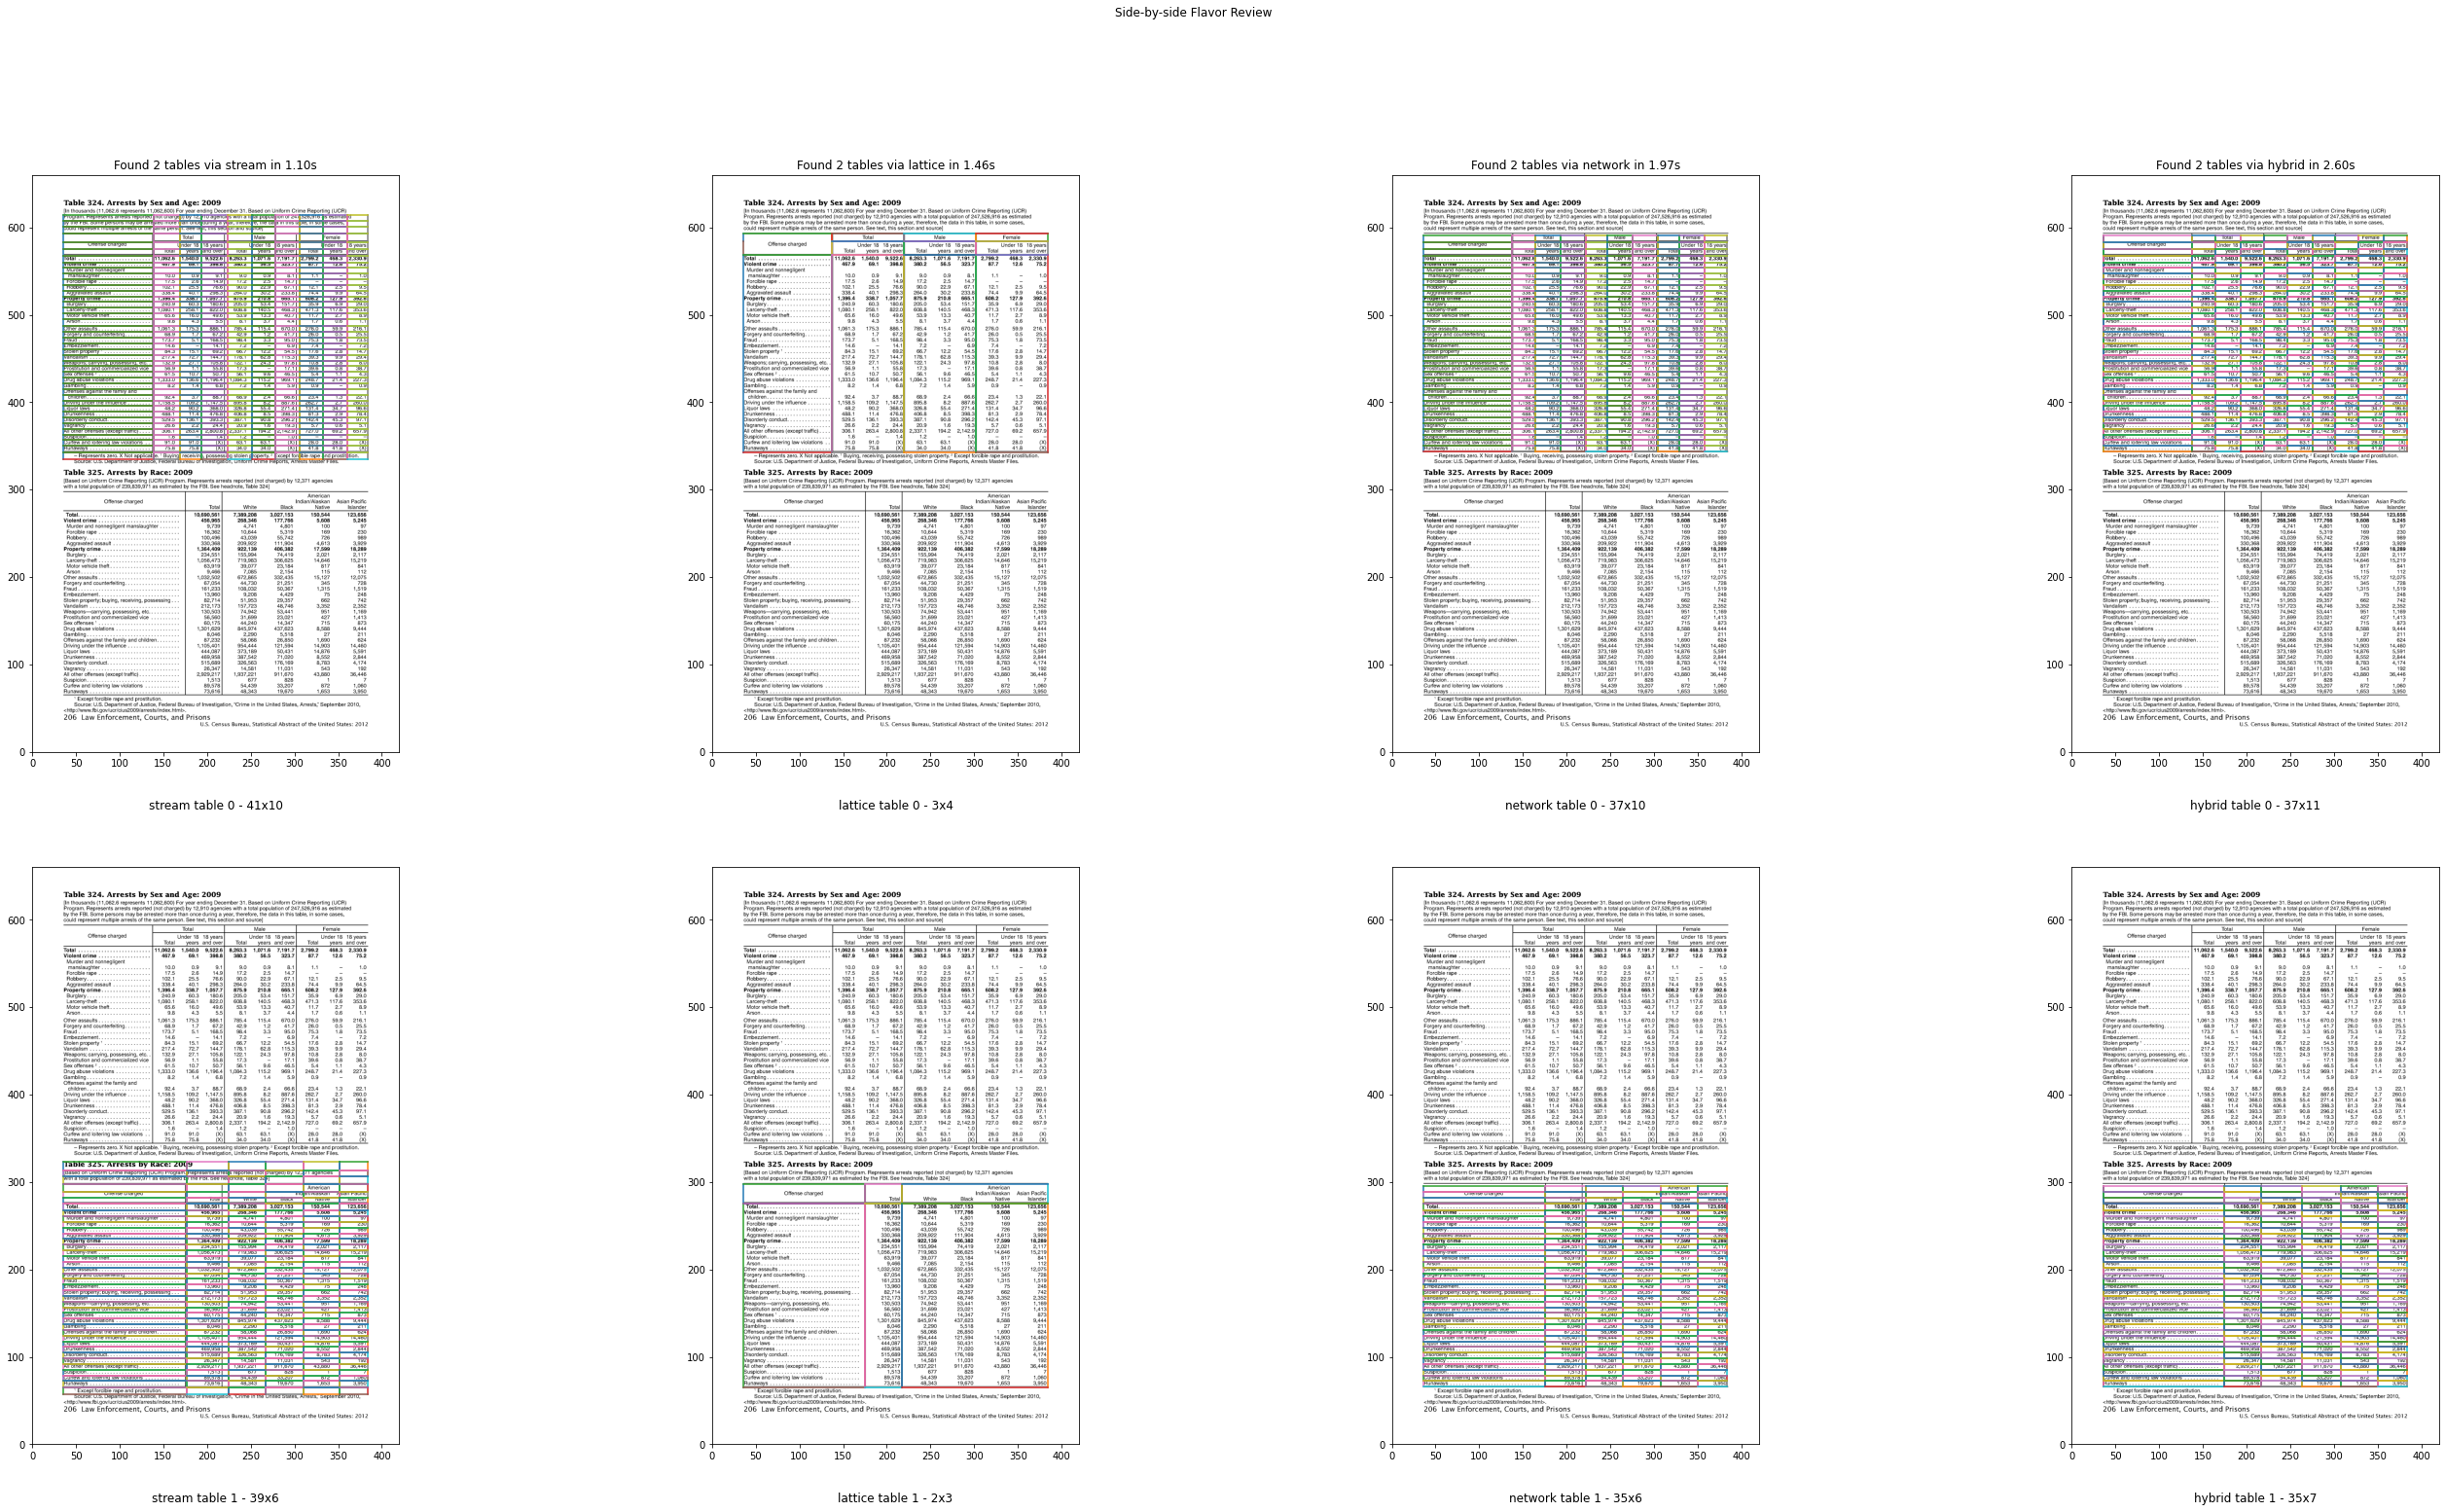

In [7]:
FLAVORS = ["stream", "lattice", "network", "hybrid"]
tables_parsed = {}
parses = {}
max_tables = 0
for idx, flavor in enumerate(FLAVORS):
    timer_before_parse = time.perf_counter()
    tables = camelot.read_pdf(filename, flavor=flavor, debug=True, **kwargs)
    timer_after_parse = time.perf_counter()
    max_tables = max(max_tables, len(tables))

    parses[flavor] = {
        "tables": tables,
        "time": timer_after_parse - timer_before_parse
    }

    print("Found {count_tables} table(s) via algo {flavor}:".format(
        count_tables=len(tables),
        flavor=flavor
    ))
    for idx, table in enumerate(tables):
        flavors_matching = []
        for previous_flavor, previous_tables in tables_parsed.items():
            for prev_idx, previous_table in enumerate(previous_tables):
                if previous_table.df.equals(table.df):
                    flavors_matching.append(
                        "{previous_flavor} table {prev_idx}".format(
                            previous_flavor=previous_flavor, prev_idx=prev_idx))
        if flavors_matching:
            print("Same table as found in {}".format(", ".join(flavors_matching)))
        else:
            print("Flavor {} table {}:".format(flavor, idx))
            display(table.df)
            print("After Flavor {} table {}:".format(flavor, idx))
    tables_parsed[flavor] = tables


# Set up plots to be large enough for visualization
PLOT_HEIGHT = 12
plt.rcParams["figure.figsize"] = [PLOT_HEIGHT * len(FLAVORS), PLOT_HEIGHT * max_tables]
fig, axes = plt.subplots(max_tables, len(FLAVORS))
fig.suptitle('Side-by-side Flavor Review')
for idx, flavor in enumerate(FLAVORS):
    parse = parses[flavor]
    tables = parse["tables"]
    parse_time = parse["time"]
    for table_idx, table in enumerate(tables):
        if max_tables > 1:
            ax = axes[table_idx][idx]
        else:
            ax = axes[idx]
        fig = camelot.plot(table, kind='grid', ax=ax)
        if table_idx == 0:
            ax.set_title("Found {table_num} tables via {flavor} in {parse_time:.2f}s".format(
                table_num=len(tables),
                flavor=flavor,
                parse_time=parse_time,
            ))
        ax.text(
            0.5,-0.1, 
            "{flavor} table {table_idx} - {rows}x{cols}".format(
                flavor=flavor,
                table_idx=table_idx,
                rows=table.shape[0],
                cols=table.shape[1],
            ), 
            size=12, ha="center", 
            transform=ax.transAxes
        )
        timer_after_plot = time.perf_counter()

fig

In [8]:
type(axes)

numpy.ndarray

In [9]:
tables_parsed

{'stream': <TableList n=2>,
 'lattice': <TableList n=2>,
 'network': <TableList n=2>,
 'hybrid': <TableList n=2>}